<a href="https://colab.research.google.com/github/haoming150ty/Personal-Portfolio/blob/main/Assignment_01_Haoming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 01 (100 points)**
- Instructor: [Jaeung Sim](https://www.business.uconn.edu/person/jaeung-sim/) (University of Connecticut)
- Course: OPIM 5512 Data Science Using Python
- Release Date: February 7 (Fri), 2025
- Submission Due: February 21 (Fri), 2025

**Objectives**
1. Process a real-world dataset using `NumPy` and `Pandas`.
1. Practice brief visualization of the processed data.

**References**
* [Spotify Charts](https://charts.spotify.com/home)
> *Notes*. For now, Spotify charts are accessible only if you log in with Spotify, and they do not allow you to use automatic scrapping tools and distribution of data. The current dataset was collected before the current policy and distributed only for educational purposes.

## **Introduction**

* In this assignment, you will explore Spotify's Daily Top 200 Streaming Charts for each of 50+ countries and the global market. You will import an `xlsx` file (not `csv` file). In this file, the `Dataset` sheet is a raw dataset, the `Day_Index` sheet has information about the day-of-week for each calendar day, and the `Country_Index` sheet provides country information for each region code.

* By exploring this data, you will practice the basic functions of DataFrame and basic visualization. Also, such an exploration will lead to practical insights for data scientists interested in music streaming.

* You can get help from various sources, such as online documents and even artificial intelligence (e.g., ChatGPT). However, you should make sure that you do your own work.

##### **Step 1: Preparation**

In [ ]:
# Set your Google Drive directory
import os
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/My Drive/OPIM 5512') # You may need to change this directory

##### **Step 2. Data Processing and Analysis (100 pts)**

**Question 1 (15 pts).**
* Import the `Dataset` sheet, the `Day_Index` sheet, and the `Country_Index` sheet of `data_assignment01.xlsx` as separate `DataFrame` objectives (6 pts).
* Then, join the three dataframes not to make any information loss (6 pts).
* Lastly, print the head of the final dataframe (3 pts).

In [ ]:
# (6 pts) Import the xlsx file as three separate dataframe objects

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import datasets by sheet
# Load the dataset from the provided Excel file
file_path = "/content/drive/My Drive/OPIM 5512/dataset_assignment_01.xlsx"

# Load all sheets into separate DataFrames
sheets = pd.ExcelFile(file_path).sheet_names
sheets

# Load each sheet into a DataFrame
df_dataset = pd.read_excel(file_path, sheet_name="Dataset")
df_day_index = pd.read_excel(file_path, sheet_name="Day_Index")
df_country_index = pd.read_excel(file_path, sheet_name="Country_Index")

# Display the first few rows of each dataset
df_dataset.head(), df_day_index.head(), df_country_index.head()


(   position                    trackname        artist  streams  \
 0         1                     Chantaje       Shakira   253019   
 1         2                 Vente Pa' Ca  Ricky Martin   223988   
 2         3  ReggaetÃ³n Lento (Bailemos)          CNCO   210943   
 3         4                       Safari      J Balvin   173865   
 4         5                  Shaky Shaky  Daddy Yankee   153956   
 
                                                  url       date  day region  
 0  https://open.spotify.com/track/6mICuAdrwEjh6Y6... 2017-01-01    1     ar  
 1  https://open.spotify.com/track/7DM4BPaS7uofFul... 2017-01-01    1     ar  
 2  https://open.spotify.com/track/3AEZUABDXNtecAO... 2017-01-01    1     ar  
 3  https://open.spotify.com/track/6rQSrBHf7HlZjtc... 2017-01-01    1     ar  
 4  https://open.spotify.com/track/58IL315gMSTD37D... 2017-01-01    1     ar  ,
    day day_of_week  day_of_week_code
 0    1         Sun                 1
 1    2         Mon                 2
 

In [ ]:
# (6 pts) Join the three dataframes not to make any information loss

In [ ]:
# Merge Dataset with Day_Index on 'day'
df_merged = df_dataset.merge(df_day_index, on="day", how="left")

# Merge the result with Country_Index on 'region'
df_merged = df_merged.merge(df_country_index, on="region", how="left")


In [ ]:
# (3 pts) Print the head of the final dataframe

In [ ]:
# Display the first few rows of the final merged dataset
df_merged.head()

,position,trackname,artist,streams,url,date,day,region,day_of_week,day_of_week_code,nation,nation_code
0,1,Chantaje,Shakira,253019,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,1,ar,Sun,1,Argentina,1
1,2,Vente Pa' Ca,Ricky Martin,223988,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,1,ar,Sun,1,Argentina,1
2,3,ReggaetÃ³n Lento (Bailemos),CNCO,210943,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,1,ar,Sun,1,Argentina,1
3,4,Safari,J Balvin,173865,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,1,ar,Sun,1,Argentina,1
4,5,Shaky Shaky,Daddy Yankee,153956,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,1,ar,Sun,1,Argentina,1


**Question 2 (15 pts).**
* Calculate the monthly sum of streams by country, and draw a single bar chart showing these values (6 pts).
* Then, draw another bar chart: showing the log-transformed sum of streams by country (6 pts).
* Describe the major differences between the two plots, and specify which one is more informative for what reason (3 pts).

In [ ]:
# (6 pts) Draw a single plot showing the monthly sum of streams by country

In [ ]:
# Calculate the monthly sum of streams by country
import numpy as np
import matplotlib.pyplot as plt

# Convert 'date' to datetime format for monthly aggregation
df_merged["date"] = pd.to_datetime(df_merged["date"])
df_merged["month"] = df_merged["date"].dt.to_period("M")

# Aggregate monthly sum of streams by country
monthly_streams = df_merged.groupby(["month", "nation"])["streams"].sum().unstack()
monthly_streams.head()

nation,Argentina,Australia,Austria,Belgium,Bolivia,Brazil,Canada,Chile,Colombia,Costa Rica,...,Singapore,Slovakia,Spain,Sweden,Switzerland,Taiwan,Turkey,United Kingdom,United States,Uruguay
month,,,,,,,,,,,,,,,,,,,,,
2017-01,200467968,226426932,24184172,22847094,3339531,246521863,146037176,94464400,60363348,26142101,...,55853287,2184699,270016984,251606669,23248859,32652254,56885002,543162978,1819012159,15990296


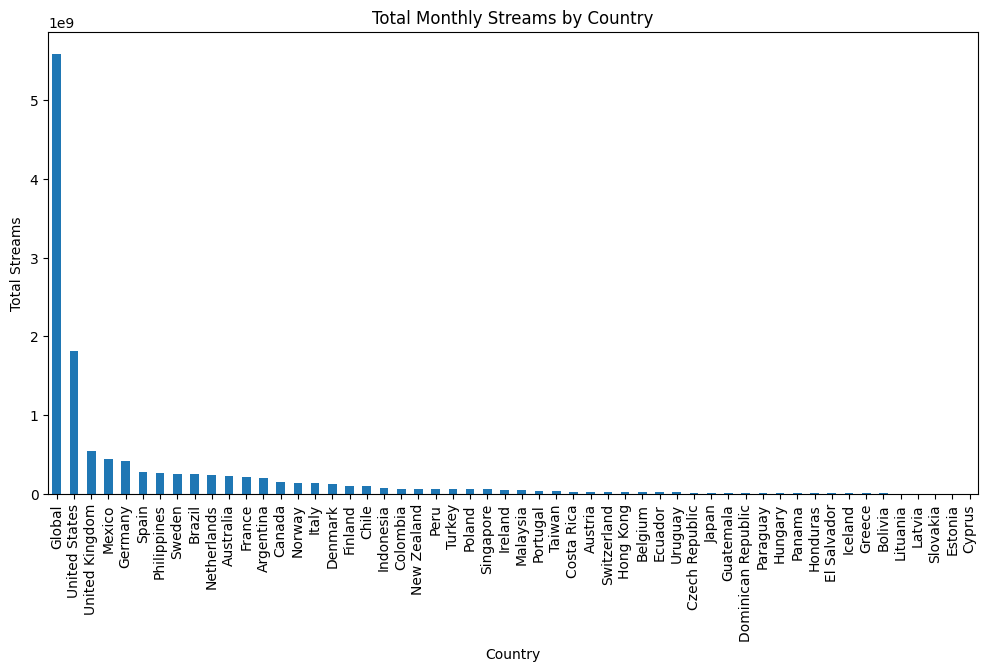

In [ ]:
# Draw a plot
# Plot the monthly sum of streams by country
monthly_streams.sum().sort_values(ascending=False).plot(kind="bar", figsize=(12, 6))
plt.title("Total Monthly Streams by Country")
plt.xlabel("Country")
plt.ylabel("Total Streams")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# (6 pts) Draw a single plot showing the log-transformed sum of streams by country

In [ ]:
# Calculate a log-transformed sum of streams variable
df_merged["log_streams"] = np.log(df_merged["streams"])
df_merged.head()

,position,trackname,artist,streams,url,date,day,region,day_of_week,day_of_week_code,nation,nation_code,month,log_streams
0,1,Chantaje,Shakira,253019,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,1,ar,Sun,1,Argentina,1,2017-01,12.441220
1,2,Vente Pa' Ca,Ricky Martin,223988,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,1,ar,Sun,1,Argentina,1,2017-01,12.319348
2,3,ReggaetÃ³n Lento (Bailemos),CNCO,210943,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,1,ar,Sun,1,Argentina,1,2017-01,12.259343
3,4,Safari,J Balvin,173865,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,1,ar,Sun,1,Argentina,1,2017-01,12.066034
4,5,Shaky Shaky,Daddy Yankee,153956,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,1,ar,Sun,1,Argentina,1,2017-01,11.944422


<Axes: xlabel='nation'>

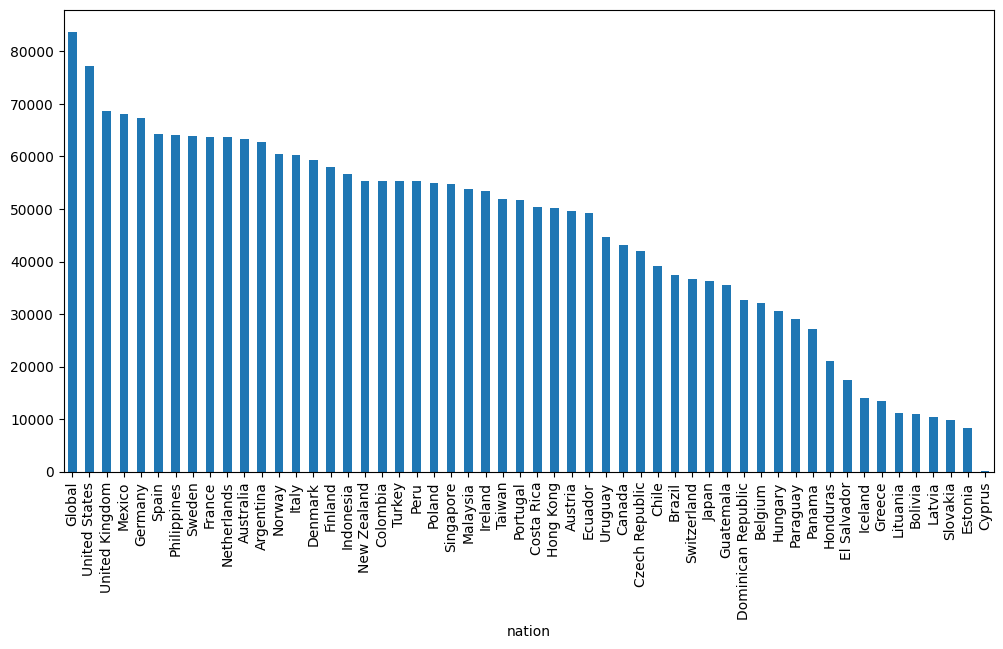

In [ ]:
# Draw a plot
# Plot the log-transformed sum of streams by country
monthly_log_streams = df_merged.groupby(["month", "nation"])["log_streams"].sum().unstack()
monthly_log_streams.sum().sort_values(ascending=False).plot(kind="bar", figsize=(12, 6))

```
# (3 pts) Describe the major differences between the two plots, and specify which one is more informative for what reason.
```

The normal plot highlights countries with very high streaming volumes (showing countries whose number stand out among all).

The log-transformed plot makes differences in smaller countries more visible (providing a detailed comparison among countries stacked in the middle with closer look).

---


If we want to examine closely the difference among all countries, log-stransformed data serves as a better tool.


**Question 3 (15 pts).**
* Calculate the number of observations by country, and draw a single bar chart showing these values (10 pts).
* Do all countries have the same number of observations (5 pts)?

In [ ]:
# (10 pts) Draw a single plot showing the number of observations by country

In [ ]:
# Calculate the number of observations by country
country_counts = df_merged["nation"].value_counts()
country_counts.head()

,count
nation,
Argentina,6200
Global,6200
Austria,6200
Ireland,6200
Italy,6200


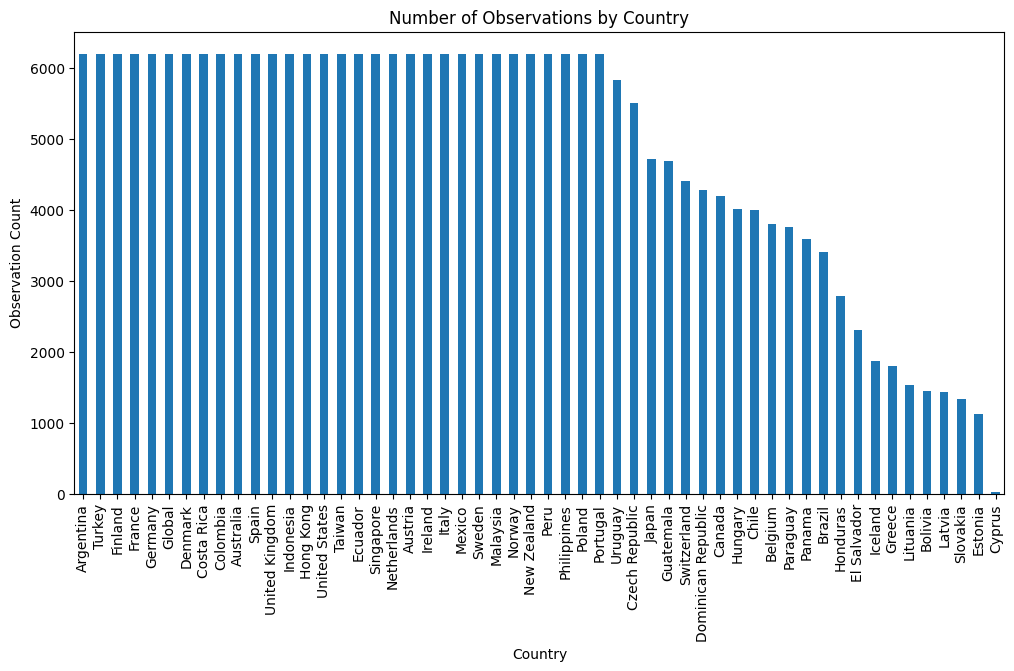

In [ ]:
# Draw a plot
country_counts.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6))
plt.title("Number of Observations by Country")
plt.xlabel("Country")
plt.ylabel("Observation Count")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Check if All Countries Have the Same Observations
country_counts.unique()

array([6200, 5826, 5503, 4718, 4684, 4400, 4273, 4200, 4015, 4000, 3800,
       3764, 3586, 3400, 2791, 2314, 1867, 1802, 1530, 1453, 1434, 1334,
       1125,   31])

```
# (5 pts) Do all countries have the same number of observations?
```

Based on the result from the code execution in the above cell, there are various numbers of observations, indicating that some countries have missing or extra data.
If all numbers are the same, then all the countries share the same number of observations.

**Question 4 (15 pts).**
* Aggregate the raw data at the position (rank) x region (nation) level (6 pts).
* Then, draw a single plot having position on its horizontal (X) axis and streams on the vertical (Y) axis. In doing so, please meet the following criteria:
  * Present three lines each of which indicates Germany, Czech Republic, and Honduras (3 pts).
  * The vertical (Y) axis should be in a log scale (3 pts).
* How are patterns across the three countries different? Describe it as specifically as possible (3 pts).

In [ ]:
# (6 pts) Aggregate the raw data at the position (rank) x region (nation) level

In [ ]:
rank_streams = df_merged.groupby(["position", "nation"])["streams"].mean().unstack()

```
# (6 pts) Draw a single plot having position on its horizontal (X) axis and streams on the vertical (Y) axis.

In doing so, please meet the following criteria:
  * Present three lines each of which indicates Germany, Czech Republic, and Honduras (3 pts).
  * The vertical (Y) axis should be in a log scale (3 pts).
```

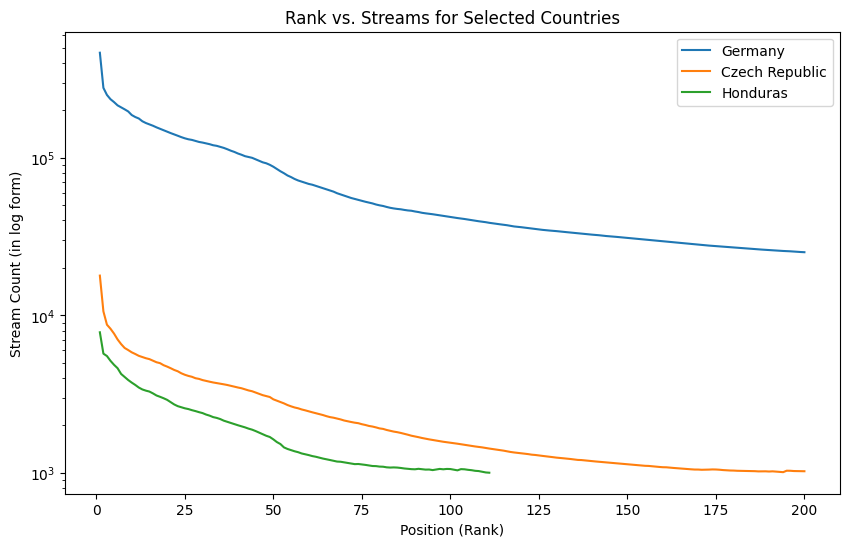

In [ ]:
plt.figure(figsize=(10, 6))
for country in ["Germany", "Czech Republic", "Honduras"]:
    plt.plot(rank_streams.index, rank_streams[country], label=country)

plt.yscale("log")
plt.xlabel("Position (Rank)")
plt.ylabel("Stream Count (in log form)")
plt.title("Rank vs. Streams for Selected Countries")
plt.legend()
plt.show()


```
# (3 pts) How are patterns across the three countries different? Describe it as specifically as possible.
```

The patterns across the three countries have inspired the following findings:

1. Germany's stream count is likely to gradually decline as the ranking number increases. This could be due to the potential fact that Germany has a steady and considerable music streaming audience base, leading to a rather consistent streaming distribution across ranks. Also, the music genre composition by German audience could be very diverse, so the popular can maintain a steady number of streams across various ranks.

2. Czech Republic, on the other hand, may show a much steeper decline in streams as ranking goes up. The reasoning behind could be similar to that of Germany: Czech Republic has a much smaller streaming audience population compared to Germany and the taste for such audience tend to concentrate in the few most popular songs rather scattered across the ranking.

3. Honduras may demonstrate a sharp drop-off in rakings beyond 50-100, potentially even with missing values in lower ranks. This could be due to fewer overall active Spotify users in the country. Or the Spotify doesn't do a good job in collecting their data in Honduras.



**Question 5 (15 pts).**
* Use `groupby` function to get 1) the total sum of streams and 2) the total number of observations at the region (country) level (6 pts).
* Then, draw a scatter plot presenting the relationship between the total sum of streams (y-axis, in the log scale) and the total number of observations (x-axis) (6 pts).
* Is there a systematic pattern between the total sum of streams and the total number of observations (3 pts)?

In [ ]:
# (6 pts) Aggregate the raw data at the region (nation) level. In doing so, you should include two variables: 1) the aggregated streams, 2) the number of observations by country (6 pts).

In [ ]:
country_agg = df_merged.groupby("nation").agg(
    total_streams=("streams", "sum"),
    total_observations=("nation", "count")
)

In [ ]:
# (6 pts) Draw a scatter plot presenting the relationship between the log-transformed aggregated streams and the number of observations by country

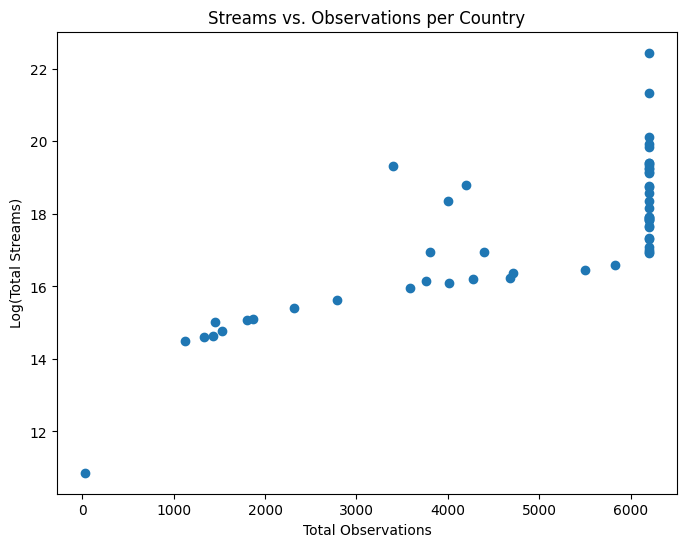

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(country_agg["total_observations"], np.log1p(country_agg["total_streams"]))
plt.xlabel("Total Observations")
plt.ylabel("Log(Total Streams)")
plt.title("Streams vs. Observations per Country")
plt.show()

```
# (3 pts) Is there a systematic pattern between the total sum of streams and the total number of observations?
```
Higher number of observations are more likely to correlate with more stream counts. It is possible that for some countries the number of observations are low but the streaming counts are high.

**Question 6. (15 pts)** Let's find a systematic pattern about missing data points precisely. You will not see `na` value here. However, please consider that the dataset is **Daily Top 200 Streaming Charts**. Also, you'd better look at raw data (both `position` and `streams` variables).

* Let's go back to the dataset you created in Question 1. Explore the minimum values of `streams` variable by country. What is the smallest minimum number $m$ among these values (5 pts)?
* Explore ranks of observations with streams value of $m$ (5 pts).
* Specify the systematic pattern for unreported data points in Spotify (5 pts).

```
# (5 pts) Let's go back to the dataset you created in Question 1. Explore the minimum values of `streams` variable by country. What is the smallest minimum number $m$ among these values?
```



In [ ]:
min_streams = df_merged.groupby("nation")["streams"].min()
smallest_min_stream = min_streams.min()
print(f"The smallest minimum number of streams is: {smallest_min_stream}")

The smallest minimum number of streams is: 1001


```
# (5 pts) Explore ranks of observations with streams value of $m$.
```

In [ ]:
df_merged[df_merged["streams"] == smallest_min_stream]["position"].value_counts()


,count
position,
139,3
133,3
185,2
51,2
125,2
45,2
130,2
39,1
184,1


```
# (5 pts) Specify the systematic pattern for unreported data points in Spotify.
```

It's likely that Spotify would simply exclude lower-ranked tracks if multiple mimimum streams occur at rank 200. There are some possible theories behind the phenomenon.
1. For starters, Spotify may be applying a cutoff threshold for including songs only in the daily top 200.

2. Then there is also the possibility that if more than several countries all have the same minimum stream count at place 200, there could be a actual lower boundary for reporting.

3. Also, Spotify, like any other major market competitors, could focus on the most profitable regions with prospect for growth and pay less attention to countries with fewer active users and premium accounts.


**Question 7. (10 pts)** Suggest and justify one method to overcome the missing data problem in this context (10 pts).

```
# (10 pts) Suggest and justify one method to overcome the missing data problem in this context
```

The justifiable method of overcoming missing data problem stems from addressing different potential causes of missing data problem. From the previous question, we know there could be several reasons why the data could be missing.

1. For larger countries with a steady and predictable rank-stream pattern, the ideal method would be to use rank-based estimation, namely borrowing the trend from available ranks to reasonably predict missing ones. This is a simple method suitable for countries with enough data.

2. Similar Country imputation becomes applicable if we deal with the missing data of smaller countries. For example, if Honduras was missing data from ranking 150-200, we could estimate these numbers with trends from similar countries like Guatemala or El Salvador. This is useful for countries that share similar streaming habits (market behavior).

**Please review the following before you submit this assignment.**
1. Did you answer all questions that you can answer?
1. Did you notice that there are some hints for some questions in others?